In [8]:
import utility
import numpy as np
import os
import natsort
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

In [9]:
path_dir = './circle/'
file_list = os.listdir(path_dir)
npz_list = []
for file_path in file_list:
    if os.path.splitext(file_path)[1] == '.npz':
        npz_list.append(file_path)
npz_list = natsort.natsorted(npz_list)
print(npz_list)
i_list=[]
e_list=[]
d_list=[]

for npz in npz_list:
    
    i, e, d = utility.npz_data(path_dir+npz)
    i_list.append(i)
    e[:,3]=(e[:,3]/1000).T
    e_list.append(e)
    d_list.append(d)
    
    #a = np.load(path_dir+npz)['normal_map']
    #plt.show()
print('Length of Depth :', len(i_list))

['0001.npz', '0002.npz', '0003.npz', '0004.npz', '0005.npz', '0006.npz', '0007.npz', '0008.npz', '0009.npz', '0010.npz', '0011.npz', '0012.npz', '0013.npz', '0014.npz', '0015.npz', '0016.npz', '0017.npz', '0018.npz', '0019.npz', '0020.npz', '0021.npz', '0022.npz', '0023.npz', '0024.npz', '0025.npz', '0026.npz', '0027.npz', '0028.npz', '0029.npz', '0030.npz', '0031.npz', '0032.npz', '0033.npz', '0034.npz', '0035.npz', '0036.npz', '0037.npz', '0038.npz', '0039.npz', '0040.npz', '0041.npz', '0042.npz', '0043.npz', '0044.npz', '0045.npz', '0046.npz', '0047.npz', '0048.npz', '0049.npz', '0050.npz', '0051.npz', '0052.npz', '0053.npz', '0054.npz', '0055.npz', '0056.npz', '0057.npz', '0058.npz', '0059.npz', '0060.npz', '0061.npz', '0062.npz', '0063.npz', '0064.npz', '0065.npz', '0066.npz', '0067.npz', '0068.npz', '0069.npz', '0070.npz', '0071.npz', '0072.npz', '0073.npz', '0074.npz', '0075.npz', '0076.npz', '0077.npz', '0078.npz', '0079.npz', '0080.npz', '0081.npz', '0082.npz', '0083.npz', '00

In [10]:
point_cloud_list = []
for i in range(len(d_list)):
#for i in range(10):
    point_cloud_list.append(utility.generate_pointcloud(d_list[i],i_list[i],e_list[i],1000))
    print('Point Cloud %d generated' %i)

Point Cloud 0 generated
Point Cloud 1 generated
Point Cloud 2 generated
Point Cloud 3 generated
Point Cloud 4 generated
Point Cloud 5 generated
Point Cloud 6 generated
Point Cloud 7 generated
Point Cloud 8 generated
Point Cloud 9 generated
Point Cloud 10 generated
Point Cloud 11 generated
Point Cloud 12 generated
Point Cloud 13 generated
Point Cloud 14 generated
Point Cloud 15 generated
Point Cloud 16 generated
Point Cloud 17 generated
Point Cloud 18 generated
Point Cloud 19 generated
Point Cloud 20 generated
Point Cloud 21 generated
Point Cloud 22 generated
Point Cloud 23 generated
Point Cloud 24 generated
Point Cloud 25 generated
Point Cloud 26 generated
Point Cloud 27 generated
Point Cloud 28 generated
Point Cloud 29 generated
Point Cloud 30 generated
Point Cloud 31 generated
Point Cloud 32 generated
Point Cloud 33 generated
Point Cloud 34 generated
Point Cloud 35 generated
Point Cloud 36 generated
Point Cloud 37 generated
Point Cloud 38 generated
Point Cloud 39 generated
Point Clou

### ply 파일 저장

In [11]:
ze = np.vstack(point_cloud_list)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(ze)
o3d.io.write_point_cloud("./ze.ply", pcd)

True

### Camera Pose 시각화

In [12]:
xs = []
ys = []
zs = []
roll = []
pitch = []
yaw = []

for i in range(len(e_list)):
    
    x = e_list[i][:,3:][0]
    y = e_list[i][:,3:][1]
    z = e_list[i][:,3:][2]
    
    a, b, c = utility.rotationMatrixToEulerAngles(e_list[i][:,:3])
    
    roll.append(a)
    pitch.append(b)
    yaw.append(c)
    
    xs.append(x[0].tolist())
    ys.append(y[0].tolist())
    zs.append(z[0].tolist())

new_x = np.sin(np.array(yaw))
new_y = np.cos(np.array(yaw))

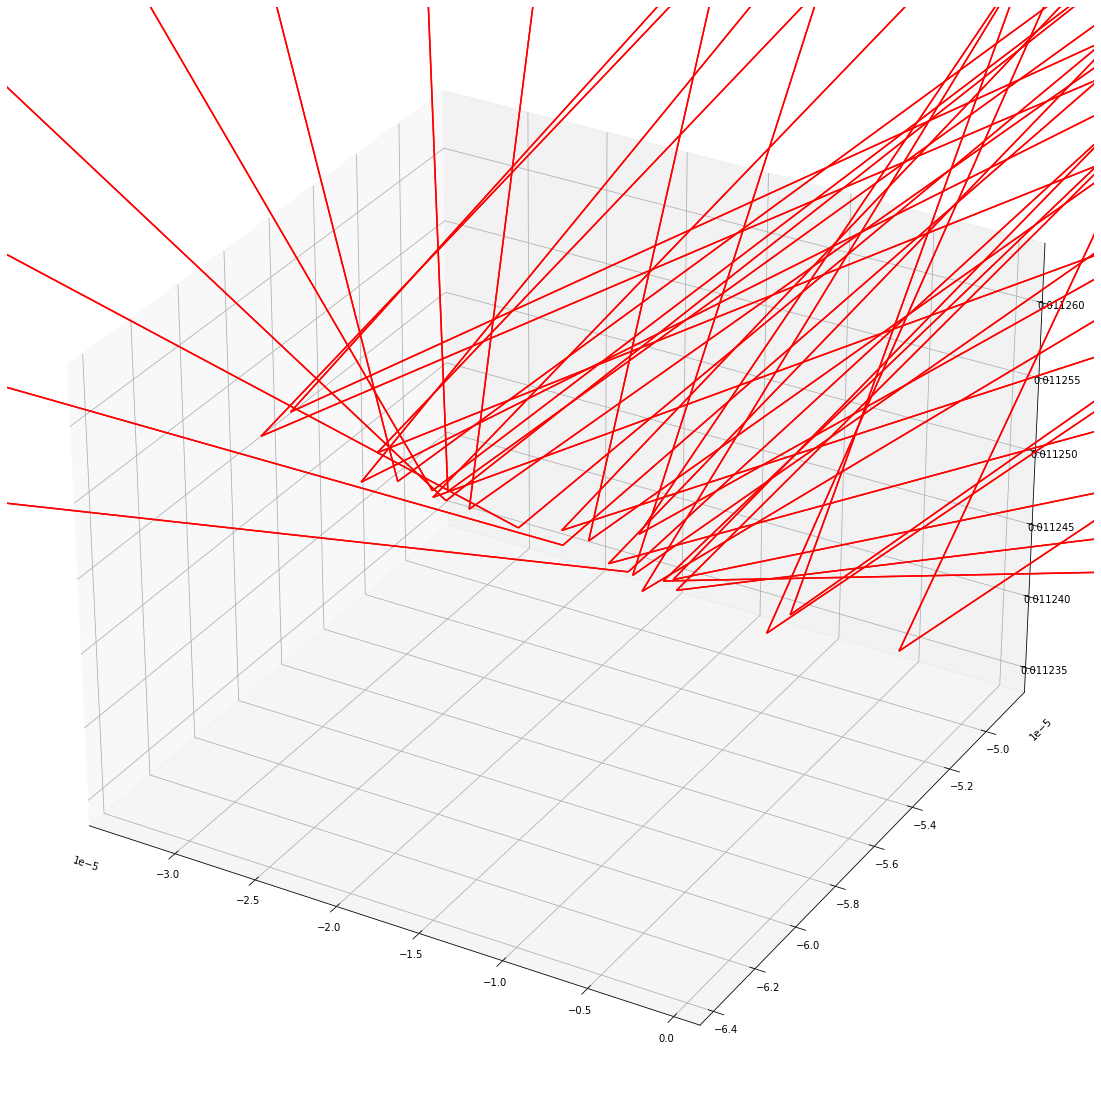

In [13]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(xs, ys, zs, new_x, new_y, 0, color='r', arrow_length_ratio=0.001)
plt.show()

In [14]:
import plotly.graph_objs as go
layout = go.Layout(title = "Digit")

plot_data = go.Scatter3d(x = xs, y = ys, z = zs,
                    mode = 'markers', marker = dict(size = 1, color='blue'))
fig = go.Figure(data = [plot_data], layout = layout)
fig.show()